In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv
/kaggle/input/ncsu-diabetes-dataset/Diabetes_DataSet.csv
/kaggle/input/diabetes-dataset/Diabetes_DataSet.csv


In [44]:
# Loading the dataset
df = pd.read_csv('../input/diabetes-dataset/Diabetes_DataSet.csv')

In [45]:
df = df.rename(columns={'Diabetes Outcome':'DO'})

In [46]:
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1 ,'No':0})
df['Visual Blurring'] = df['Visual Blurring'].map({'Yes':1 ,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1 ,'No':0})

In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,148,72,35,0,33.6,0.627,0,0,1,1,1,1
1,1,85,66,29,0,26.6,0.351,0,1,0,1,0,0
2,8,183,64,0,0,23.3,0.672,1,0,0,0,1,1
3,1,89,66,23,94,28.1,0.167,1,0,0,0,0,0
4,0,137,40,35,168,43.1,2.288,1,1,1,0,1,1


In [48]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Polyphagia', 'Visual Blurring',
       'Obesity', 'Smoker', 'High Cholestrol (HDL)', 'DO'],
      dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Polyphagia                768 non-null    int64  
 8   Visual Blurring           768 non-null    int64  
 9   Obesity                   768 non-null    int64  
 10  Smoker                    768 non-null    int64  
 11  High Cholestrol (HDL)     768 non-null    int64  
 12  DO                        768 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 78.1 KB


In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,0.432292,0.434896,0.169271,0.467448,0.528646,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,0.495717,0.496066,0.375235,0.499264,0.499504,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Polyphagia,768.0,0.432292,0.495717,0.000,0.00000,0.0000,1.00000,1.00
Visual Blurring,768.0,0.434896,0.496066,0.000,0.00000,0.0000,1.00000,1.00
Obesity,768.0,0.169271,0.375235,0.000,0.00000,0.0000,0.00000,1.00


In [52]:
df_copy = df.copy(deep = True)

In [53]:
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Smoker','High Cholestrol (HDL)']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Smoker','High Cholestrol (HDL)']].replace(0,np.NaN)

In [54]:
# Showing the Count of NANs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Polyphagia                    0
Visual Blurring               0
Obesity                       0
Smoker                      409
High Cholestrol (HDL)       362
DO                            0
dtype: int64


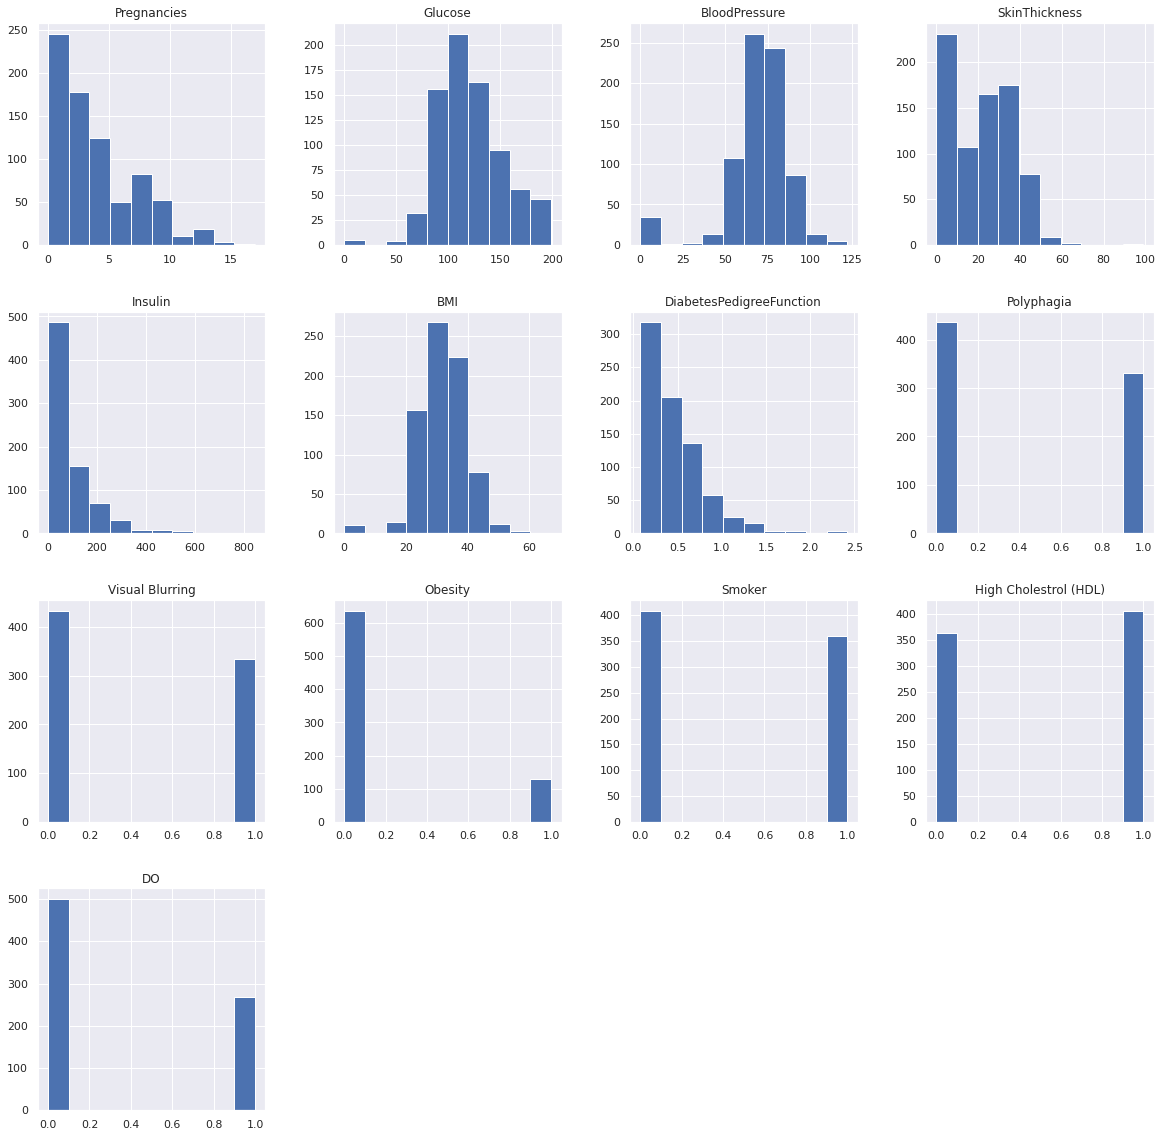

In [55]:
p = df.hist(figsize = (20,20))

In [56]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)
df_copy['Smoker'].fillna(df_copy['Smoker'].median(), inplace = True)
df_copy['High Cholestrol (HDL)'].fillna(df_copy['High Cholestrol (HDL)'].median(), inplace = True)

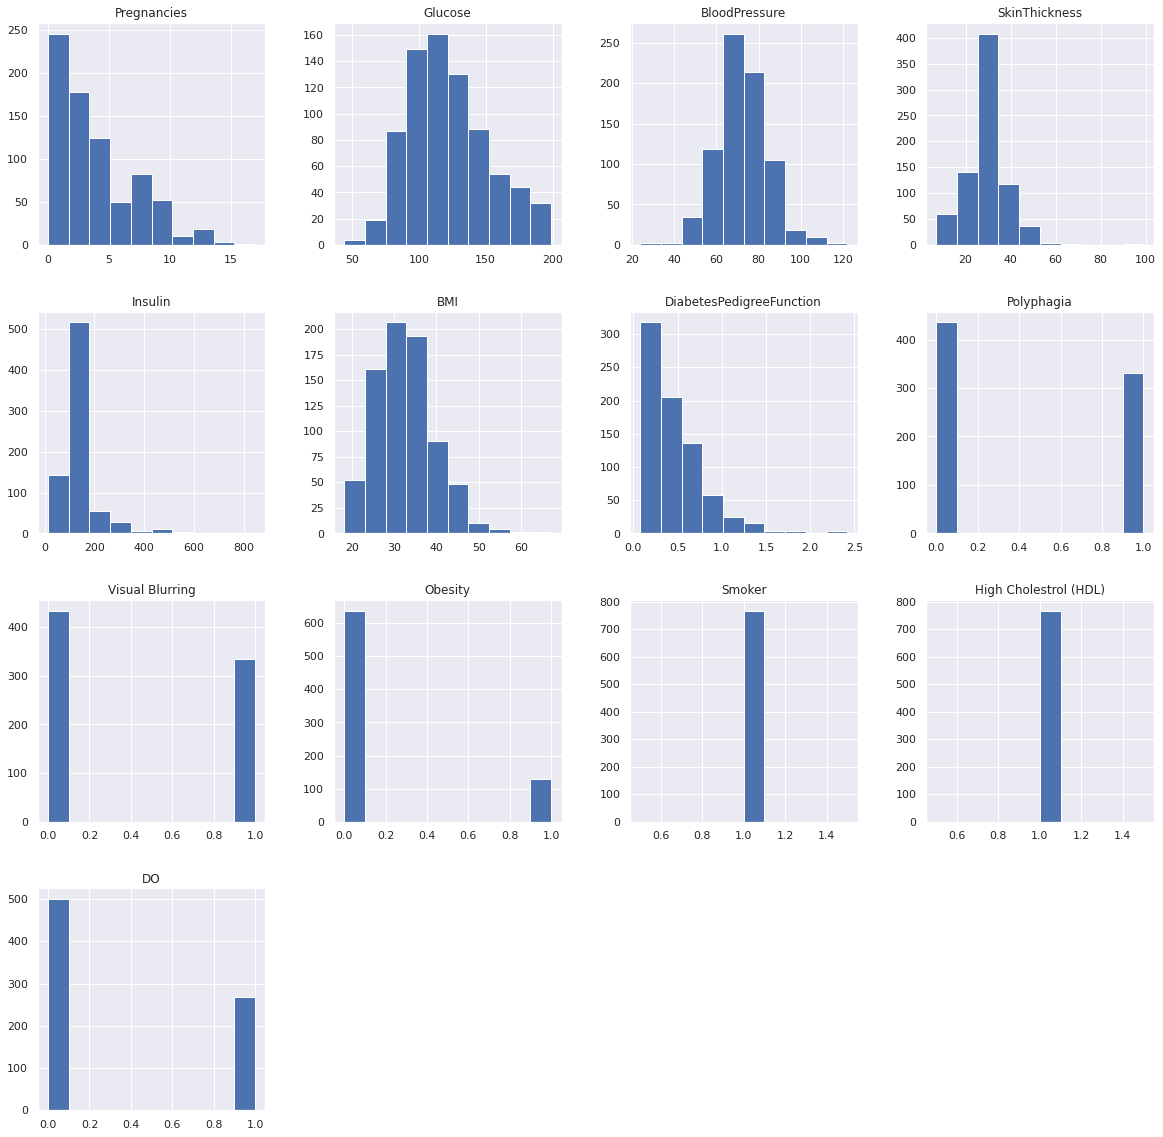

In [57]:
p = df_copy.hist(figsize = (20,20))

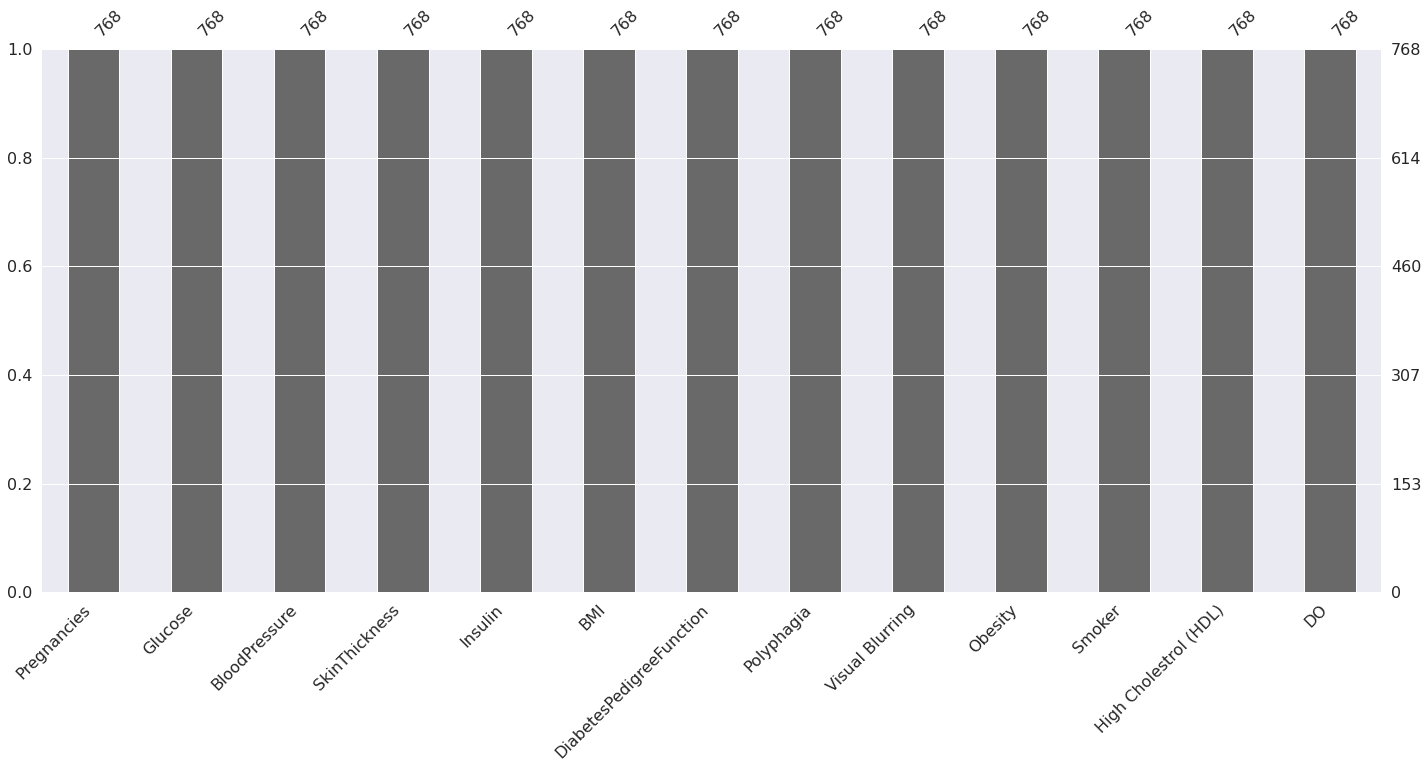

In [58]:
p = msno.bar(df)

0    500
1    268
Name: DO, dtype: int64


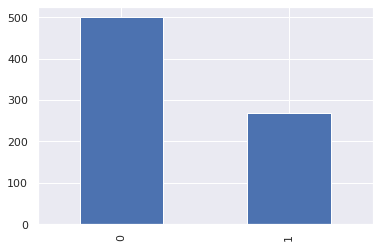

In [59]:
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["DO"].map(lambda x: color_wheel.get(x + 1))
print(df.DO.value_counts())
p=df.DO.value_counts().plot(kind="bar")

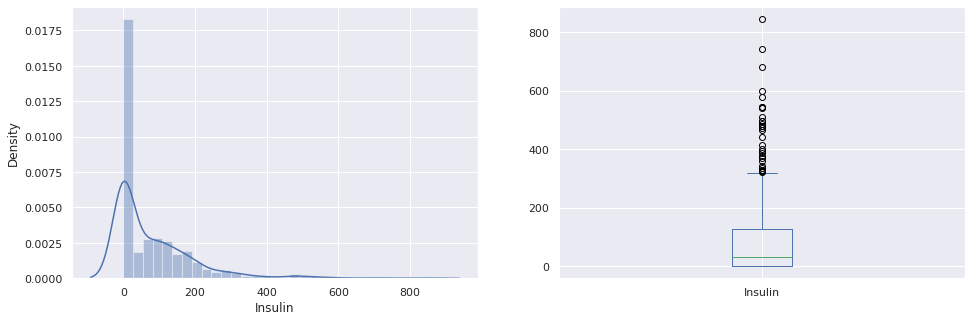

In [60]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122), df['Insulin'].plot.box(figsize=(16,5))
plt.show()

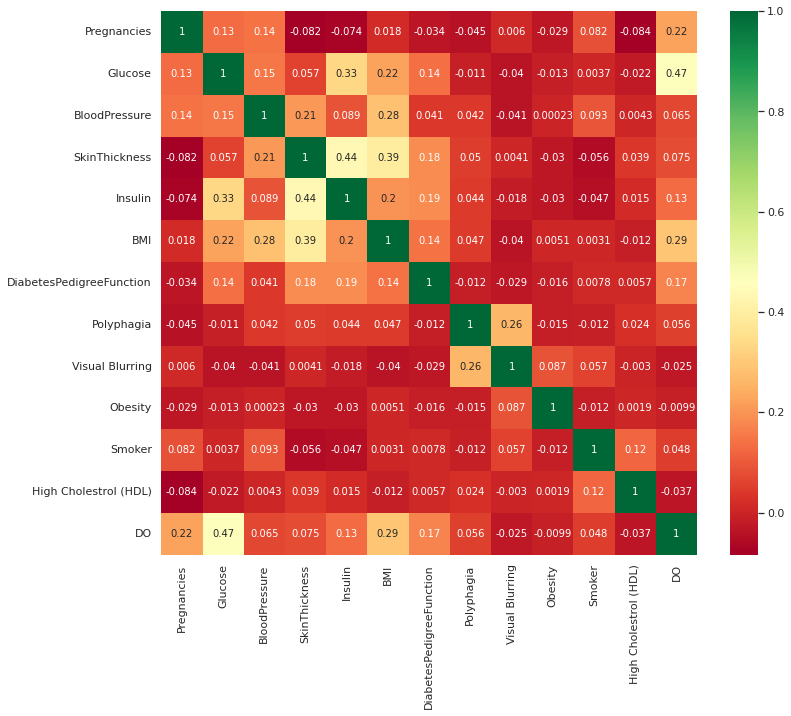

In [61]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')

In [62]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL),DO
0,6,148.0,72.0,35.0,125.0,33.6,0.627,0,0,1,1.0,1.0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,0,1,0,1.0,1.0,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,1,0,0,1.0,1.0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,1,0,0,1.0,1.0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,1,1,1,1.0,1.0,1


In [63]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_copy.drop(["DO"],axis = 1),), columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Polyphagia', 'Visual Blurring', 'Obesity', 'Smoker', 'High Cholestrol (HDL)'])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Polyphagia,Visual Blurring,Obesity,Smoker,High Cholestrol (HDL)
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,-0.872621,-0.877260,2.215331,0.0,0.0
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.872621,1.139913,-0.451400,0.0,0.0
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,1.145973,-0.877260,-0.451400,0.0,0.0
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,1.145973,-0.877260,-0.451400,0.0,0.0
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,1.145973,1.139913,2.215331,0.0,0.0


In [64]:
y = df_copy.DO
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: DO, Length: 768, dtype: int64

# **MODEL BUILDING** <br>
*Splitting the dataset* <br>

In [65]:
X = df.drop('DO', axis=1)
y = df['DO']

Now we will split the data into training and testing data using the train_test_split function

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

# **Random Forest**
Building the model using RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

Now after building the model let’s check the accuracy of the model on the training dataset.

In [68]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


So here we can see that on the training dataset our model is overfitted.

Getting the accuracy score for Random Forest

In [69]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.7165354330708661


Classification report and confusion matrix of random forest model.

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[136  26]
 [ 46  46]]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       162
           1       0.64      0.50      0.56        92

    accuracy                           0.72       254
   macro avg       0.69      0.67      0.68       254
weighted avg       0.71      0.72      0.71       254



# Decision Tree
Building the model using DecisionTree

In [71]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

Now we will be making the predictions on the testing data directly as it is of more importance.

Getting the accuracy score for Decision Tree

In [72]:
from sklearn import metrics

predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.6968503937007874


Classification report and confusion matrix of the decision tree model.

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[115  47]
 [ 30  62]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       162
           1       0.57      0.67      0.62        92

    accuracy                           0.70       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.71      0.70      0.70       254



# **Support Vector Machine (SVM)**
Building the model using Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

Prediction from support vector machine model on the testing data

In [75]:
svc_pred = svc_model.predict(X_test)

Accuracy score for SVM

In [76]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.7559055118110236


Classification report and confusion matrix of the SVM classifier.

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[147  15]
 [ 47  45]]
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       162
           1       0.75      0.49      0.59        92

    accuracy                           0.76       254
   macro avg       0.75      0.70      0.71       254
weighted avg       0.75      0.76      0.74       254



df = pd.read_csv('../input/diabetes-dataset/Diabetes_DataSet.csv')

# Logistic Regression

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, names=names)

# Split the dataset into input features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7467532467532467


# K-Means

Using K-Means to make the 3 clusters for the ```Type-1```, ```Type-2```,and ```Type-3``` diabetes type

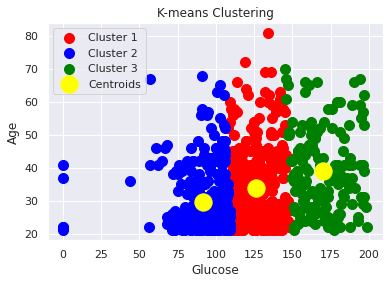

     Glucose  Age  Pregnancies    Diabetes Type
0        148   50            6  Type 2 Diabetes
1         85   31            1  Type 2 Diabetes
2        183   32            8  Type 2 Diabetes
3         89   21            1  Type 2 Diabetes
4        137   33            0  Type 1 Diabetes
..       ...  ...          ...              ...
763      101   63           10  Type 2 Diabetes
764      122   27            2  Type 1 Diabetes
765      121   30            5  Type 1 Diabetes
766      126   47            1  Type 1 Diabetes
767       93   23            1  Type 2 Diabetes

[768 rows x 4 columns]


In [79]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
df = pd.read_csv('/kaggle/input/ncsu-diabetes-dataset/Diabetes_DataSet.csv')

# Select relevant features
X = df[['Glucose', 'Age', 'Pregnancies']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Define diabetes types based on cluster assignments
diabetes_types = {0: 'Type 1 Diabetes', 
                  1: 'Type 2 Diabetes', 
                  2: 'Type 2 Diabetes' if np.any(df['Pregnancies'] == 1) else 'Type 3 Diabetes'}

# Predict diabetes type for each data point
y_pred = [diabetes_types[i] for i in y_kmeans]

# Add predicted diabetes type to the dataframe
df['Diabetes Type'] = y_pred

# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()
plt.show()

# Print the predicted diabetes types
print(df[['Glucose', 'Age', 'Pregnancies', 'Diabetes Type']])


In [80]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate the silhouette score
silhouette = silhouette_score(X, y_kmeans)
print('Silhouette score:', silhouette)

# Calculate the Calinski-Harabasz index
calinski = calinski_harabasz_score(X, y_kmeans)
print('Calinski-Harabasz index:', calinski)

Silhouette score: 0.40393651081011583
Calinski-Harabasz index: 943.941948991854


### **Explanation :**
Accuracy, f1 score, and precision are evaluation metrics that are typically used for supervised learning models, where we have a labeled dataset with both input features and their corresponding labels. In unsupervised learning, such as K-means clustering, we do not have these labels, and therefore, these metrics are not applicable.

Instead, we can use metrics such as the silhouette score or the Calinski-Harabasz index to evaluate the quality of the clustering. These metrics evaluate how well-separated the clusters are and how compact they are. A higher silhouette score or Calinski-Harabasz index indicates a better clustering result.

***Silhouette score*** is a metric used to evaluate the **quality** of a clustering algorithm's output. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a score closer to 1 indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters. A score closer to -1 indicates the opposite, and a score close to 0 indicates that the object is on the boundary between two clusters.

***Calinski-Harabasz index*** is another metric used to **evaluate** clustering algorithms. It measures the ratio of the between-cluster dispersion and the within-cluster dispersion. The larger the value of the index, the better the clustering algorithm's output, indicating that the clusters are well-separated and compact. The Calinski-Harabasz index is calculated by dividing the between-group variance by the within-group variance, multiplied by $(N - k)/(k - 1)$, where $N$ is the total number of points and $k$ is the number of clusters.

**Type - 3 Diabetes** <br>
It’s gestational diabetes 
But later in life they hv high changes of getting type 2 diabetes.

***Type - 3*** is of two types of medical cure: *One can be by diet* and other can be of *by medicines*

## Predict diabetes type for new data points

In [81]:
# Assume that you have loaded and preprocessed your data as shown earlier

# Fit the K-means model to your data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Define diabetes types based on cluster assignments
diabetes_types = {0: 'Type 1 Diabetes', 
                  1: 'Type 2 Diabetes', 
                  2: 'Type 3 Diabetes'}

# Predict diabetes type for new data points
new_data = np.array([[100, 130, 170], [14, 25, 43], [0, 0, 1]])  # Example new data points
new_predictions = kmeans.predict(new_data)
new_diabetes_types = [diabetes_types[i] for i in new_predictions]

# Print the predicted diabetes types for the new data points
print(new_diabetes_types)

# Output: ['Type 1 Diabetes', 'Type 2 Diabetes', 'Type 2 Diabetes']

['Type 1 Diabetes', 'Type 2 Diabetes', 'Type 2 Diabetes']


## Accuracy by SilHoutte Score

In [82]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette = silhouette_score(X, kmeans.labels_)

# Calculate Calinski-Harabasz index
ch_index = calinski_harabasz_score(X, kmeans.labels_)

print('Silhouette Score:', silhouette)
print('Calinski-Harabasz Index:', ch_index)

Silhouette Score: 0.40393651081011583
Calinski-Harabasz Index: 943.941948991854


# Saving the Model (by Pickel)

In [85]:
import pickle
from sklearn.cluster import KMeans

# train the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# save the trained model to a file using pickle
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)
